# 03. 머신러닝의 기초-수치예측
    3-1. 선형회귀 소개, 데이터준비하기
    3-2. 경사하강법을 이용한 학습하기
    3-3. 손실함수-경사하강법 관계 알기
    3-4. 선형회귀 위한 뉴런 만들기

## 3-1. 선형회귀 소개, 데이터 준비하기
* **<font color="red">선형회귀 Linear Regression</font>** : y=wx+b의 {w,b} 찾는, 딥러닝의 기초 알고리즘   
(ex) {w,b} 찾는 과정 간단히 알아보자 

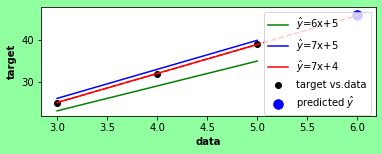

In [5]:
import numpy as np
from matplotlib import pyplot as plt
x=np.array([]);x=np.append(x,[ 3, 4, 5]);y=np.array([]);y=np.append(y,[25,32,39]);
fig = plt.figure(figsize=(6, 2));fig.patch.set_facecolor('xkcd:mint green')
plt.scatter(x,y,c='k',label='target vs.data')
w=6;b=5; plt.plot(x, w*x+b, c='g',label='$\hat{y}$=6x+5')#--------step[1] Initialize {m,b}
w = w+1; plt.plot(x, w*x+b, c='b',label='$\hat{y}$=7x+5')#--------step[2] Adjust "m" and check
b = b-1; plt.plot(x, w*x+b, c='r',label='$\hat{y}$=7x+4')#--------step[3] Adjust "b" and check
new=6;   plt.scatter(new,new*w+b, c='b',s=90,label='predicted $\hat{y}$')#step[4] Predict with final{m,b} 
x=np.append(x,new);plt.plot(x,w*x+b,linestyle='--',c='r')
plt.legend();plt.xlabel('data',weight='bold');plt.ylabel('target',weight='bold');plt.show()

* **<font color="red">데이터 준비</font>** : 현실적 문제해결에 적용위한 충분한 데이터와 타겟 준비

Dataset diabetes consist of 	: ['DESCR', 'data', 'data_filename', 'feature_names', 'target', 'target_filename']
Data shape= (442, 10) 		: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
				  [ 0.038  0.051  0.062  0.022 -0.044 -0.035 -0.043 -0.003  0.02  -0.018]  |  151.0
				  [-0.002 -0.045 -0.051 -0.026 -0.008 -0.019  0.074 -0.039 -0.068 -0.092]  |  75.0
				  [ 0.085  0.051  0.044 -0.006 -0.046 -0.034 -0.032 -0.003  0.003 -0.026]  |  141.0


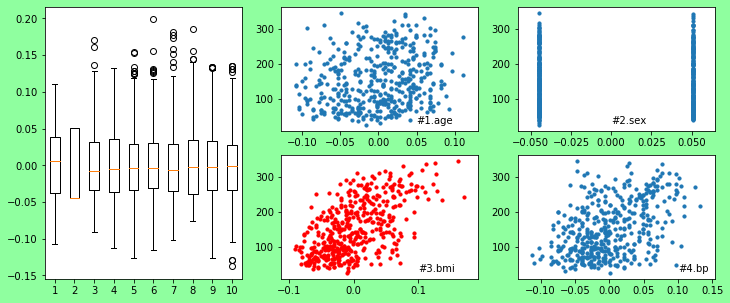

In [6]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes() ; data=diabetes.data; target=diabetes.target
print("Dataset diabetes consist of \t:",dir(diabetes))#당뇨병 데이터셋의 attibutes 리스트겟
print("Data shape=",np.shape(diabetes.data),"\t\t:",diabetes.feature_names)  #데이터의 구성
for i in range(0,3) : print ("\t\t\t\t ",np.round(diabetes.data[i],3)," | ",diabetes.target[i])
x=data[:,2];y=target;                  # set x,y only for 'bmi' feature
fig = plt.figure(figsize=(12,5 ));fig.patch.set_facecolor('xkcd:mint green')
p1=plt.subplot(131);p1.boxplot(diabetes.data,vert=True);
p2=plt.subplot(232);p2.scatter(data[:,0],y,s=10);p2.text(.05,29,"#1.age")
p3=plt.subplot(233);p3.scatter(data[:,1],y,s=10);p3.text(.00,29,"#2.sex")
p4=plt.subplot(235);p4.scatter(x,y,s=10,c='r');  p4.text(.10,29,"#3.bmi")
p5=plt.subplot(236);p5.scatter(data[:,3],y,s=10);p5.text(.10,29,"#4.bp")
plt.show()

<font size="3"><font color="green"> &nbsp;&emsp;&emsp;- box plot은 각 특성들의 통계이다. <br />
 &nbsp;&emsp;&emsp;- 10개의 특성에 대한 target값을 표현하는 10D plot은 필요없다. <br />
 &nbsp;&emsp;&emsp;- 각 특성, 즉 저차원에서 얻은 직관을 확장시키는 방법이면 충분하다. <br />
 &nbsp;&emsp;&emsp;- {나이, 성별, 혈압}과 달리 bmi특성(=x)은 target과 선형관계가 보인다. <br />
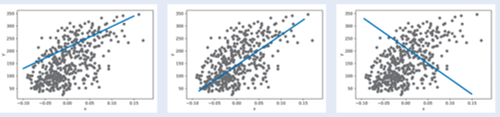
 &nbsp;&emsp;&emsp; &nbsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 가운데가 최적의{w,b}$\rightarrow$데이터 많은데 어떻게 찾을까?</font>



## 3-2. 경사하강법을 이용한 학습하기
* **<font color="red">경사하강법Gradient Descent Method</font>** : {w,b} 찾는 방법中1 손실함수 (또는 에러) 최소화 하도록 모델 조정  
<font size="3"><font color="green"> &nbsp;&emsp;선형회귀 푸는 알고리즘은 경사하강법 외에도 많다 : Normal Eq., Decision Tree, Support Vector Machine<br /></font> 
<font color="magenta"> (0) 초기화 {w,b}  <br />&emsp;&emsp; 
<font size="3"><font color="violet">
    (1)&emsp; 예측값 및 차이 $\hat{y}$=wx+b, $\epsilon$=y-$\hat{y}$ <br />&emsp;&emsp;
    (2)&emsp; 손실함수 (또는 에러 $\epsilon$) 최소되도록 {w,b} 수정  <br />
    <font color="magenta"> (3) 모든 샘플(x[i])에 대해 (1)(2)반복 <br />
    (4) 모든 샘플에 대한 반복을 또 반복 (epoch>1)</font>


### 3-2-1. for $\small{\hat{y} \uparrow}$ ) $w=w\pm dw$ 
<font size="3"> &nbsp;&emsp;- 정해진 dw값으로 w 조정<br /> 
    &nbsp;&emsp;- $x$부호($\small{\hat{y}}$ vs.$w$의 기울기)를 따져서 dw를 +or- 할 지 일일이 확인해야한다.<br /> &nbsp;&emsp;- x,y의 스케일 상관없이 dw정하는 것 비효율적이다.</font>
    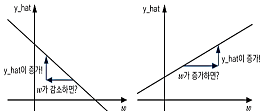
    

In [10]:
w=1.0;b=1.0;dw=0.1;db=0.1         # (0) 초기화 
y_hat = w*x[0]+b;err=y[0]-y_hat   # (1) 예측값 및 dy 계산
print("x[0]=",round(x[0],2),"| y[0]=",y[0],"| w=",w,"| y_hat=",round(y_hat,2),"| err=",round(err,2))
w = w + dw; b = b + db            # (2) dy최소 되도록 {w,b}수정
y_hat = w*x[0]+b;err=y[0]-y_hat   
print("  \t\t\t     " , round(w,2),"|  \t  ",round(y_hat,2),"|    ",round(err,2))

x[0]= 0.06 | y[0]= 151.0 | w= 1.0 | y_hat= 1.06 | err= 149.94
  			      1.1 |  	   1.17 |     149.83


<font size=3><font color='cyan'> ------------------------$\epsilon$ 줄이려면 한참 더 조정해야 하는군!!</font>

### 3-2-2. for $\small{\hat{y} \uparrow}$  ) $w=w+w_{rate}$
<font size="3"> &nbsp;&emsp;- 여기서는 변화율을 이용해서 dy부호 따지는 과정을 skip하는 방법을 소개한다.<br />
&nbsp;&emsp;&emsp;&emsp;$w_{rate}=\frac{d\hat{y}}{dw}=\frac{dw \cdot x+0}{dw}=x$, &emsp;$b_{rate}=\frac{d\hat{y}}{db}=\frac{0 \cdot x+db}{db}=1$<br />
&nbsp;&emsp;&emsp;&emsp;$\small{w=w+w_{rate}=w+x}$, &emsp;&emsp;$\small{b=b+b_{rate}=b+1}$<br />
    &nbsp;&emsp;&emsp;&emsp;$\small{dw>0\rightarrow d\hat{y}>0}$, &ensp;$\small{dw<0\rightarrow d\hat{y}<0}$<br />
    &nbsp;&emsp;- 스케일문제는 여전<br />
    &nbsp;&emsp;- 소용없다 for $\small{\hat{y} \downarrow}$ </font>

In [12]:
w=1.0;b=1.0;dw=0.1               # (0) 초기화 
y_hat = w*x[0]+b;err=y[0]-y_hat   # (1) 예측값 및 dy 계산
print("x[0]=",round(x[0],2),"| y[0]=",y[0],"| w=",w,"| y_hat=",round(y_hat,2),"| err=",round(err,2))
w = w + x[0]; b= b + 1                   # (1) dy최소 되도록 {w,b}수정
y_hat = w*x[0]+b;err=y[0]-y_hat   
print("  \t\t\t     " , round(w,2),"|  \t  ",round(y_hat,2),"|     ",round(err,2))

x[0]= 0.06 | y[0]= 151.0 | w= 1.0 | y_hat= 1.06 | err= 149.94
  			      1.06 |  	   2.07 |      148.93


<font size=3><font color='cyan'> ------------------------$\epsilon$ 여전히 크다.</font>

### 3-2-3. for $\small{\hat{y} \uparrow\downarrow}$ ) $w=w+w_{rate}\cdot \epsilon$
<font size="3"> &nbsp;&emsp;- 스케일문제와 $\small{\hat{y} \uparrow\downarrow}$를 모두 해결하는 방법이다. <br />
    &nbsp;&emsp;&emsp;&emsp;$\small{w=w+w_{rate}\cdot\epsilon}=w+x\cdot(\hat{y}-y)$,&emsp;$\small{b=b+b_{rate}\cdot\epsilon}=b+1\cdot(\hat{y}-y)$

In [9]:
w=1.0;b=1.0;dw=0.1               # (0) 초기화 
y_hat = w*x[0]+b;err=y[0]-y_hat   # (1) 예측값 및 dy 계산
print("x[0]=",round(x[0],2),"| y[0]=",y[0],"| w=",w,"| y_hat=",round(y_hat,2),"| err=",round(err,2))
w = w + x[0]*err; b= b + 1*err                   # (1) dy최소 되도록 {w,b}수정
y_hat = w*x[0]+b;err=y[0]-y_hat   
print("  \t\t\t   ", round(w,2),"|    ",round(y_hat,2)," |      ",round(err,2))

x[0]= 0.06 | y[0]= 151.0 | w= 1.0 | y_hat= 1.06 | err= 149.94
  			    10.25 |     151.57  |       -0.57


<font size=3><font color='cyan'> ------------------------$\epsilon$ 이 확연히 한번에 줄어든 것을 확인할 수 있다!!</font><br />

##### 3-2-3 (a)  모든 샘플에 대해 epoch=1번 반복.

w= 587.9 | b= 99.4 | ERR= 0.2 | LOSS= 4502.68


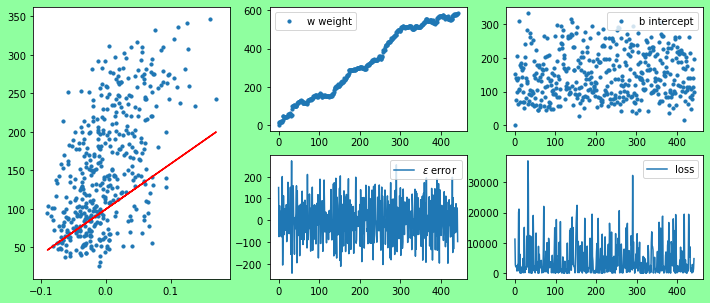

In [14]:
#1. 초기화
w=1.0;b=1.0;
#    history 알 수있게 (필수 X) array생성 for {w,b,err}
W=[];B=[];Err=[];W.append(w);B.append(b);Loss=[];
for i in range(0,len(x)):
    y_hat = w*x[i]+b; err=y[i]-y_hat; loss=0.5*(err**2)
    w=w+x[i]*err;b=b+err
    W.append(w);B.append(b);Err.append(err);Loss.append(loss)
print("w=",round(w,1),"| b=",round(b,1),"| ERR=",round(sum(Err)/len(Err),1),
      "| LOSS=",round(sum(Loss)/len(Loss),2))
y_hat=w*x+b
fig = plt.figure(figsize=(12,5 ));fig.patch.set_facecolor('xkcd:mint green')
p1=plt.subplot(131);p1.scatter(x,y,s=10);p1.plot(x,y_hat,c='r')
p2=plt.subplot(232);p2.scatter([i for i in range(0,len(W))],W,s=10,label='w weight');p2.legend()
p3=plt.subplot(233);p3.scatter([i for i in range(0,len(B))],B,s=10,label='b intercept');p3.legend()
p4=plt.subplot(235); p4.plot([i for i in range(0,len(Err))],Err,label="$\epsilon$ error");p4.legend()
p5=plt.subplot(236); p5.plot([i for i in range(0,len(Loss))],Loss,label="loss");p5.legend()
plt.show();
y_hat1=w*x+b;w1=w;b1=b

<font size=3><font color='green'>결과 그래프를 살펴보자. <br />
 - p1)  x vs. y    : 전체샘플을 epoch=1 반복한 {w,b}결과 그래프이다. **안맞아보임**.<br />
 - p2) history   w : 찾는 과정에서 w 값이 꾸준히 증가 (감소도 몇번) 하는 경향을 알 수 있다.<br />
 - p3) history   b : 찾는 과정에서 b 값이 별 **상관없음**을 알 수 있다.<br />
 - p4)p5) err&loss : 증감 반복, **줄어드는 경향이 없음**.<br />
 

<font size=3><font color='cyan'> ------------------------$\epsilon$ 이 줄어드는 경향을 보이지 않음. fit도 별로.!!</font><br />

##### 3-2-3 (b)  모든 샘플에 대해 epoch=10번 반복.

w= 913.6 | b= 123.4 | Err= 0.0 | Loss= 3713.8


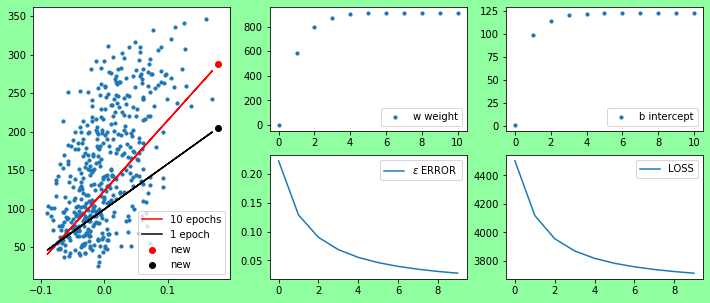

In [12]:
#1. 초기화
w=1.0;b=1.0;
#    history 알 수있게 (필수 X) array생성 for {w,b,err}
W=[];B=[];W.append(w);B.append(b);
Err=[];Loss=[];ERR_=[];LOSS=[]
epochs=10
for epoch in range(0,epochs):
    for i in range(0,len(x)):
        y_hat = w*x[i]+b; err=y[i]-y_hat; loss=0.5*(err**2)
        w=w+x[i]*err;b=b+err
        Err.append(err);Loss.append(loss)
    W.append(w);B.append(b);ERR.append(sum(Err)/len(Err));LOSS.append(sum(Loss)/len(Loss))
print("w=",round(w,1),"| b=",round(b,1),"| Err=",round(ERR[len(ERR)-1],1),
      "| Loss=",round(LOSS[len(LOSS)-1],1))
y_hat=w*x+b
new=0.18;ynew1=w1*new+b1;ynew=w*new+b
fig = plt.figure(figsize=(12,5 ));fig.patch.set_facecolor('xkcd:mint green')
p1=plt.subplot(131);p1.scatter(x,y,s=10);
p1.plot(x,y_hat,c='r',label="10 epochs");p1.scatter(new,ynew,c='r',label='new')
p1.plot(x,y_hat1,c='k',label="1 epoch");p1.scatter(new,ynew1,c='k',label='new');p1.legend()
p2=plt.subplot(232);p2.scatter([i for i in range(0,len(W))],W,s=10,label='w weight');p2.legend()
p3=plt.subplot(233);p3.scatter([i for i in range(0,len(B))],B,s=10,label='b intercept');p3.legend()
p4=plt.subplot(235); p4.plot([i for i in range(0,len(ERR))],ERR,label="$\epsilon$ ERROR");p4.legend()
p5=plt.subplot(236); p5.plot([i for i in range(0,len(LOSS))],LOSS,label="LOSS");p5.legend()
plt.show();

<font size=3><font color='green'>결과 그래프를 살펴보자. <br />
 - p1)  x vs. y    : 전체샘플을 epoch=10 반복한 {w,b}결과 그래프이다. **1번 보단 나음**.<br />
 - p2) history   w : 찾는 과정에서 w 값이 급증후 수렴.<br />
 - p3) history   b : 찾는 과정에서 b 값이 급증후 수렴.<br />
 - p4)p5) err&loss : 둘다 줄어들어 수렴.<br />

<font size=3><font color='cyan'> ------------------------$\epsilon$ 줄어드는 경향 확실! 근데 fit은 좀더 향상될 수 있으면 좋겠음!!</font><br />

## 3-3. 손실함수와 경사하강법의 관계
* **<font color="red">손실함수 Loss/Cost/Objective Function</font>** : 실제, 예상값의 차이를 함수로 정의한 것.<br />
<font size="3"><font color="green"> &nbsp;&emsp;앞에서 경사하강법이란 손실함수를 최소화하다보면 데이터를 잘 표현하는 직선의 {w,b}가 찾아진다는게 핵심이었다.  <br /> 
    &emsp; $loss=\frac{1}{2}\epsilon^2$,&emsp;$\begin{cases}
     \frac{\partial}{\partial w}loss&=\frac{\partial \epsilon}{\partial w}\cdot\epsilon&=-\frac{\partial \hat{y}}{\partial w}\cdot\epsilon&=-w_{rate}\cdot\epsilon \\
     \frac{\partial}{\partial b}loss&=\frac{\partial \epsilon}{\partial b}\cdot\epsilon&=-\frac{\partial \hat{y}}{\partial b }\cdot\epsilon&=-b_{rate}\cdot\epsilon
    \end{cases}$  <br /></font>
결국 경사하강법에서 {w,b}를 조정하는 (scale+$\small{\hat{y}\uparrow\downarrow}$해결) 수식이 사실은 loss의 편미분이었다. <br />
    $\small{\begin{cases}
    w=&w&-&\frac{\partial}{\partial w}loss=&w&-&w_{grad}=&w&-(-\epsilon\cdot x)\\b=&b&-&\frac{\partial}{\partial b}loss=&b&-&b_{grad}=&b&-(-\epsilon\cdot 1)
    \end{cases}}$ <br />
편미분을 빼는 이유는 손실함수를 낮추는 방향이라서...(?). 이 수식들을 **<font color='red'>오차역전파</font>**라고함.<br />
    <font size="3"><font color="green"> &nbsp;&emsp;변화율 ($\small{w_{rate}}$, $\small{b_{rate}}$) 대신, 편미분을 gradient 라 따로 정의 ($\small{\frac{\partial}{\partial w}loss}$, $\small{\frac{\partial}{\partial b}loss} \rightarrow\small{w_{grad}}$, $\small{b_{grad}}$)해서 사용할 것이다. gradient가 전파/소실 된다라는 표현쓰겠다.  

## 3-4. 선형회귀 위한 뉴런 만들기
* **<font color="red">뉴런 Neuron</font>** : 지금까지 한 경사하강법의 알고리즘을 하나의 unit으로 (class)만들어 보자.<br />
<font size="3"><font color="green"> &nbsp;&emsp;Neuron하고 상관없기 때문에 혼동피하고자 unit으로 부르는 사람도 있음.

fit result : y_hat =  913.6 x +  123.39


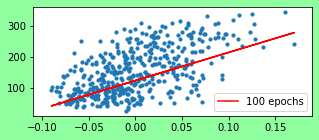

In [39]:

#---------------------------------------#
class Neuron:
    def __init__(self):self.w=1.0;self.b=1.0;
    def forPass(self,x):y_hat=self.w*x+self.b;return y_hat
    def backProp(self,x,err):w_grad=-err*x;b_grad=-err*1;return w_grad,b_grad
    def fit(self,x,y,epochs=100):
        for epoch in range(0,epochs):
            for i in range(0,len(x)):
                y_hat=self.forPass(x[i]);err=y[i]-y_hat;w_grad,b_grad=self.backProp(x[i],err)
                #w_grad,b_grad=self.backProp(x[i],y[i]-self.forPass(x[i]))
                self.w -= w_grad;self.b -= b_grad
        print("fit result : y_hat = ",str(round(self.w,2)),"x + ",str(round(self.b,2)))
    
#---------------------------------------#
#let's try to use the class to do the analysis!!!
neuron = Neuron();neuron.fit(x,y);y_hat=neuron.w*x+neuron.b
#print(fit_labl)
fig = plt.figure(figsize=(5,2));fig.patch.set_facecolor('xkcd:mint green')
plt.scatter(x,y,s=10);plt.plot(x,y_hat,c='r',label='100 epochs');plt.legend();plt.show()